In [43]:
import pandas as pd

# Load the CSV file into a DataFrame
asset_returns = pd.read_csv("/asset_returns.csv")

# Display the first few rows of the DataFrame
asset_returns.head()

,Dates,TVIXF.US.Equity,ARKK.US.Equity,UPS.US.Equity,TTWO.US.Equity,REMX.US.Equity,FDN.US.Equity,BLOK.US.Equity,BOTZ.US.Equity,SQQQ.US.Equity,...,SHIO.US.Equity,CRM.US.Equity,ADBE.US.Equity,DXCM.US.Equity,PYPL.US.Equity,ZBRA.US.Equity,XOP.US.Equity,NULG.US.Equity,PG.US.Equity,XLV.US.Equity
0,10/30/2023,2.571429,0.156897,0.123145,0.052793,0.153164,0.057160,-0.028279,0.097204,-0.072174,...,0.163043,0.017614,-0.032338,0.098811,0.145152,0.127568,0.031450,0.031121,-0.022779,0.039651
1,9/29/2023,0.200000,0.102848,0.086803,0.012893,0.064978,0.062151,0.102860,0.081311,-0.133562,...,0.218435,0.092120,0.096960,0.082315,0.069278,0.162685,0.005206,0.062198,0.058138,0.034721
2,8/31/2023,-0.066667,0.153143,0.104664,0.075527,0.156144,0.024656,0.186078,0.090161,-0.045172,...,0.016393,0.016030,-0.023546,0.233512,0.212926,0.119814,-0.038001,0.006436,0.012699,0.007057
3,7/31/2023,0.964286,-0.125074,-0.042110,-0.037793,0.018244,-0.061712,-0.127349,-0.013727,0.118273,...,-0.044096,-0.061108,-0.104693,0.031712,-0.119889,-0.039388,-0.099280,-0.029637,-0.029175,-0.010585
4,6/30/2023,-0.418182,-0.082691,-0.068340,-0.064080,-0.047499,-0.040800,-0.114286,-0.050800,0.219461,...,-0.114706,0.057370,-0.145606,-0.087542,-0.071033,-0.112429,-0.083366,-0.068478,-0.060894,-0.036917


In [44]:
# Calculate expected monthly returns for each asset (excluding the Dates column)
expected_monthly_returns = asset_returns.iloc[:, 1:].mean()

# Display the expected monthly returns
expected_monthly_returns

TVIXF.US.Equity    0.258066
ARKK.US.Equity     0.011068
UPS.US.Equity     -0.000304
TTWO.US.Equity     0.003246
REMX.US.Equity     0.005756
FDN.US.Equity     -0.000525
BLOK.US.Equity     0.004647
BOTZ.US.Equity     0.001042
SQQQ.US.Equity     0.089392
ITA.US.Equity      0.000947
SHIO.US.Equity    -0.006516
CRM.US.Equity     -0.001483
ADBE.US.Equity    -0.007916
DXCM.US.Equity    -0.006834
PYPL.US.Equity     0.015974
ZBRA.US.Equity     0.002966
XOP.US.Equity      0.012684
NULG.US.Equity    -0.006942
PG.US.Equity      -0.007400
XLV.US.Equity     -0.004532
dtype: float64

In [45]:
# Calculate expected monthly returns for each asset (excluding the Dates column)
expected_monthly_returns = asset_returns.mean()

# Convert the series to a DataFrame for table display
expected_monthly_returns_df = expected_monthly_returns.to_frame(name="Expected Monthly Returns")

# Display the table
print(expected_monthly_returns_df)

                 Expected Monthly Returns
TVIXF.US.Equity                  0.258066
ARKK.US.Equity                   0.011068
UPS.US.Equity                   -0.000304
TTWO.US.Equity                   0.003246
REMX.US.Equity                   0.005756
FDN.US.Equity                   -0.000525
BLOK.US.Equity                   0.004647
BOTZ.US.Equity                   0.001042
SQQQ.US.Equity                   0.089392
ITA.US.Equity                    0.000947
SHIO.US.Equity                  -0.006516
CRM.US.Equity                   -0.001483
ADBE.US.Equity                  -0.007916
DXCM.US.Equity                  -0.006834
PYPL.US.Equity                   0.015974
ZBRA.US.Equity                   0.002966
XOP.US.Equity                    0.012684
NULG.US.Equity                  -0.006942
PG.US.Equity                    -0.007400
XLV.US.Equity                   -0.004532


<ipython-input-45-239bbb8ab71b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  expected_monthly_returns = asset_returns.mean()


In [50]:
expected_monthly_returns_df.to_csv('File1.csv', index=True)

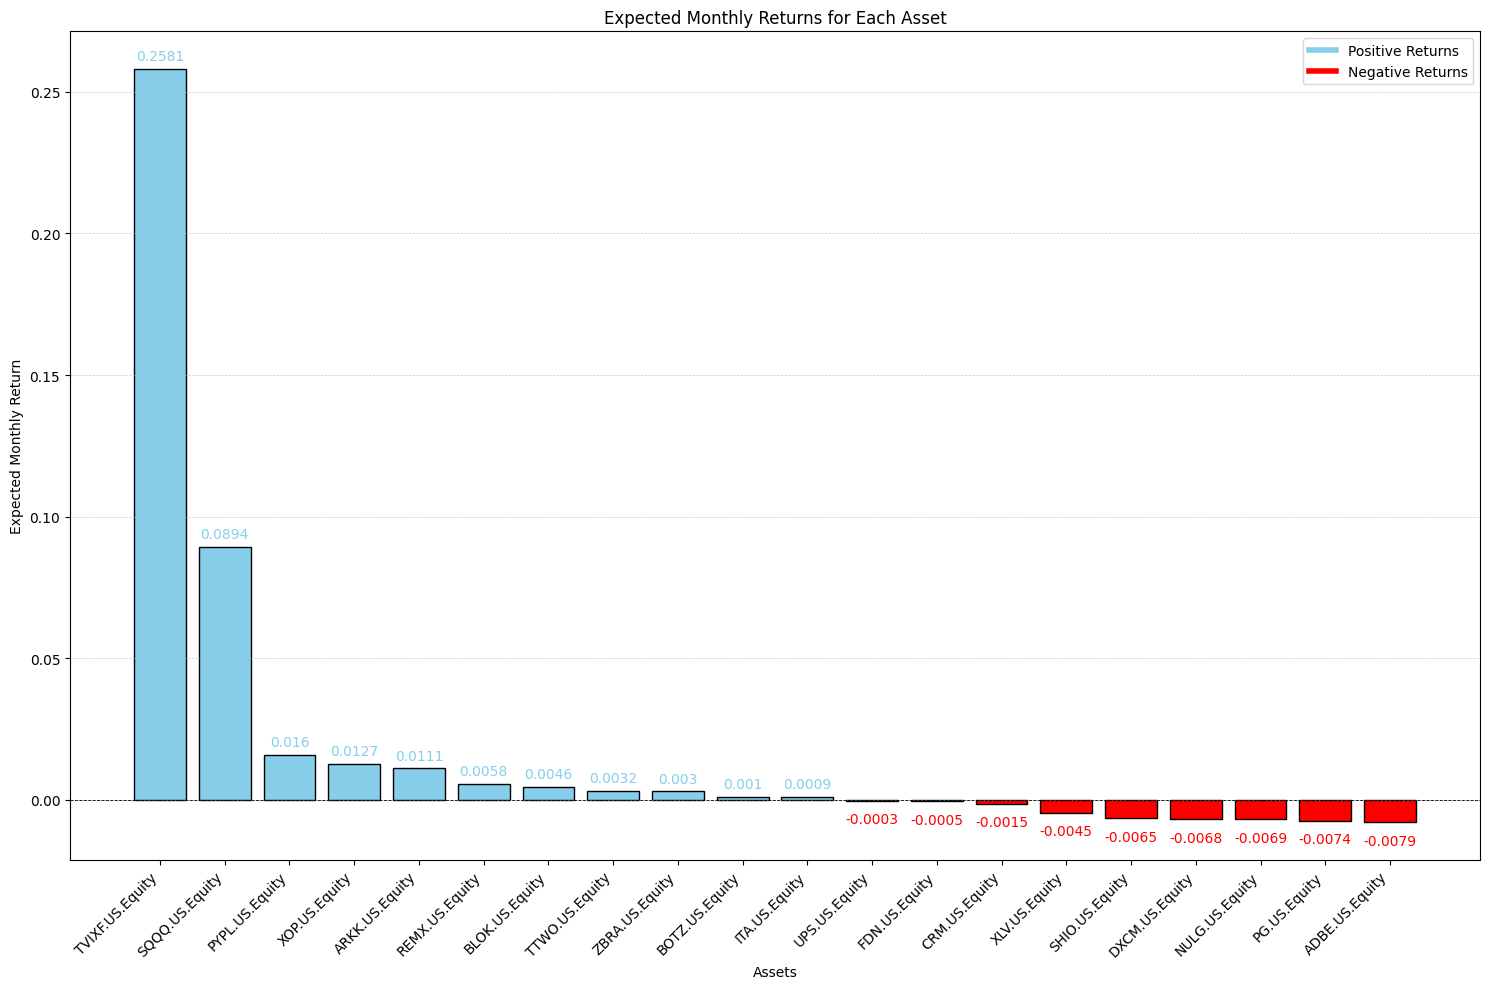

In [8]:
import matplotlib.pyplot as plt

# Sort the data in descending order for better visualization
sorted_returns = expected_monthly_returns.sort_values(ascending=False)

# Determine colors for each bar
colors = ['red' if value < 0 else 'skyblue' for value in sorted_returns.values]

# Create the bar plot with increased size
plt.figure(figsize=(15,10))
bars = plt.bar(sorted_returns.index, sorted_returns.values, color=colors, edgecolor='black')
plt.title('Expected Monthly Returns for Each Asset')
plt.ylabel('Expected Monthly Return')
plt.xlabel('Assets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a horizontal line at y=0 for distinction
plt.axhline(0, color='black', linewidth=0.6, linestyle='--')

# Place the original value on top of each bar with adjusted position
for bar, color in zip(bars, colors):
    yval = bar.get_height()
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, round(yval, 4), ha='center', va='bottom', color=color)
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval - 0.004, round(yval, 4), ha='center', va='top', color=color)

# Add a custom legend for colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='skyblue', lw=4, label='Positive Returns'),
                   Line2D([0], [0], color='red', lw=4, label='Negative Returns')]
plt.legend(handles=legend_elements)

plt.tight_layout()

# Display the plot
plt.show()


In [55]:
# Annualize the expected monthly returns
annualized_returns = expected_monthly_returns * 12

# Display the annualized returns
annualized_returns

TVIXF.US.Equity    3.096787
ARKK.US.Equity     0.132820
UPS.US.Equity     -0.003646
TTWO.US.Equity     0.038958
REMX.US.Equity     0.069070
FDN.US.Equity     -0.006298
BLOK.US.Equity     0.055767
BOTZ.US.Equity     0.012500
SQQQ.US.Equity     1.072708
ITA.US.Equity      0.011366
SHIO.US.Equity    -0.078193
CRM.US.Equity     -0.017793
ADBE.US.Equity    -0.094986
DXCM.US.Equity    -0.082004
PYPL.US.Equity     0.191688
ZBRA.US.Equity     0.035592
XOP.US.Equity      0.152203
NULG.US.Equity    -0.083305
PG.US.Equity      -0.088803
XLV.US.Equity     -0.054382
dtype: float64

In [57]:
anualized_returns_df = annualized_returns.to_csv('Annualized_returns.csv', index=True)

<ipython-input-12-7666138e9639>:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


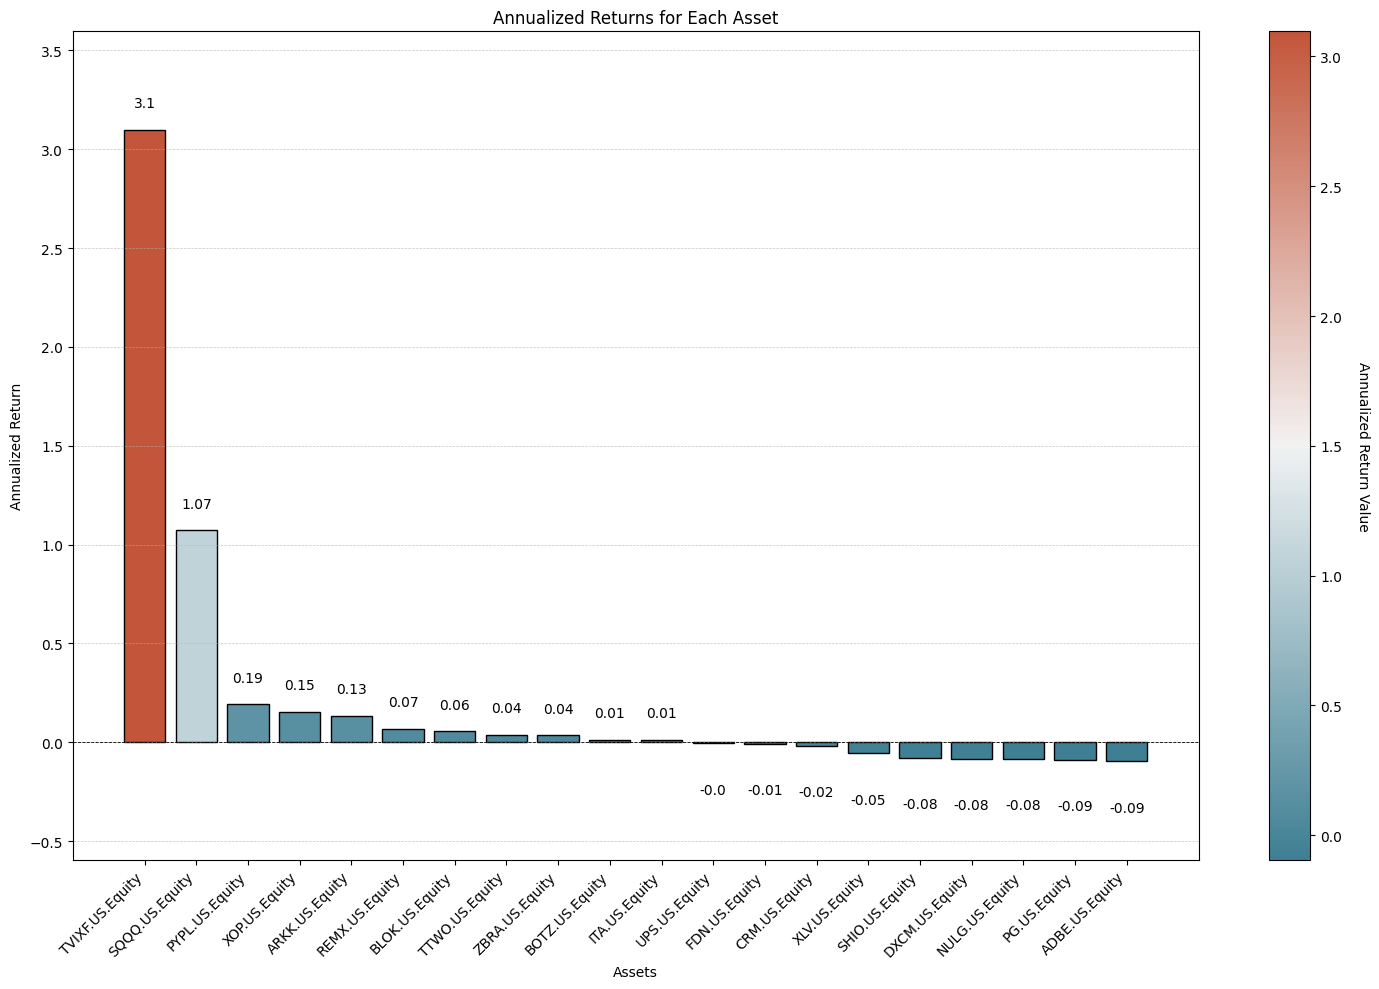

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data in descending order for better visualization
sorted_annualized_returns = annualized_returns.sort_values(ascending=False)

# Determine colors for each bar using a diverging color palette
norm = plt.Normalize(sorted_annualized_returns.min(), sorted_annualized_returns.max())
colors = sns.diverging_palette(220, 20, as_cmap=True)(norm(sorted_annualized_returns.values))

# Create the bar plot with increased size
plt.figure(figsize=(15,10))
bars = plt.bar(sorted_annualized_returns.index, sorted_annualized_returns.values, color=colors, edgecolor='black')
plt.title('Annualized Returns for Each Asset')
plt.ylabel('Annualized Return')
plt.xlabel('Assets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust y-axis limits to accommodate labels
plt.ylim(sorted_annualized_returns.min() - 0.5, sorted_annualized_returns.max() + 0.5)

# Add a horizontal line at y=0 for distinction
plt.axhline(0, color='black', linewidth=0.6, linestyle='--')

# Place the original value on top of each bar with adjusted position
for bar, color in zip(bars, colors):
    yval = bar.get_height()
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', color='black')
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval - 0.2, round(yval, 2), ha='center', va='top', color='black')

# Add a colorbar for the diverging palette
sm = plt.cm.ScalarMappable(cmap=sns.diverging_palette(220, 20, as_cmap=True), norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Annualized Return Value', rotation=270, labelpad=20)

plt.tight_layout()

# Display the plot
plt.show()


In [60]:
# Calculate the correlation matrix for the asset returns (excluding the Dates column)
correlation_matrix = asset_returns.iloc[:, 1:].corr()

# Display the correlation matrix
correlation_matrix


,TVIXF.US.Equity,ARKK.US.Equity,UPS.US.Equity,TTWO.US.Equity,REMX.US.Equity,FDN.US.Equity,BLOK.US.Equity,BOTZ.US.Equity,SQQQ.US.Equity,ITA.US.Equity,SHIO.US.Equity,CRM.US.Equity,ADBE.US.Equity,DXCM.US.Equity,PYPL.US.Equity,ZBRA.US.Equity,XOP.US.Equity,NULG.US.Equity,PG.US.Equity,XLV.US.Equity
TVIXF.US.Equity,1.000000,-0.062947,-0.165587,-0.051527,-0.079968,-0.134864,-0.117543,-0.192423,0.160052,-0.425809,-0.017131,-0.073727,-0.133316,0.023806,-0.131791,-0.169750,-0.319611,-0.234982,-0.413504,-0.393147
ARKK.US.Equity,-0.062947,1.000000,0.558732,0.446046,0.634504,0.900585,0.737900,0.838095,-0.783943,0.445890,0.727406,0.700989,0.633567,0.504715,0.625304,0.667767,0.383231,0.837620,0.066402,0.524635
UPS.US.Equity,-0.165587,0.558732,1.000000,0.446210,0.501473,0.554484,0.390927,0.601755,-0.636873,0.393511,0.393949,0.428610,0.490390,0.276074,0.372332,0.494304,0.243646,0.613692,0.478216,0.583493
TTWO.US.Equity,-0.051527,0.446046,0.446210,1.000000,0.329217,0.462397,0.363788,0.433109,-0.515230,0.178938,0.462624,0.328123,0.374745,0.314451,0.318565,0.233932,0.062580,0.432625,0.117795,0.341421
REMX.US.Equity,-0.079968,0.634504,0.501473,0.329217,1.000000,0.622011,0.617917,0.664421,-0.600292,0.433284,0.505367,0.373092,0.475677,0.275594,0.396983,0.590720,0.484209,0.698128,0.079458,0.601079
FDN.US.Equity,-0.134864,0.900585,0.554484,0.462397,0.622011,1.000000,0.737763,0.856617,-0.860570,0.514347,0.808567,0.741482,0.709080,0.500138,0.671660,0.722918,0.447323,0.907066,0.222064,0.559908
BLOK.US.Equity,-0.117543,0.737900,0.390927,0.363788,0.617917,0.737763,1.000000,0.667699,-0.639487,0.412865,0.591938,0.544954,0.603621,0.433378,0.495246,0.637594,0.410335,0.736961,0.056844,0.356676
BOTZ.US.Equity,-0.192423,0.838095,0.601755,0.433109,0.664421,0.856617,0.667699,1.000000,-0.809651,0.541098,0.685028,0.623329,0.665686,0.403461,0.531103,0.718711,0.458897,0.875870,0.240207,0.631983
SQQQ.US.Equity,0.160052,-0.783943,-0.636873,-0.515230,-0.600292,-0.860570,-0.639487,-0.809651,1.000000,-0.369041,-0.712034,-0.679702,-0.737976,-0.435388,-0.567969,-0.712949,-0.343193,-0.864147,-0.319362,-0.658658
ITA.US.Equity,-0.425809,0.445890,0.393511,0.178938,0.433284,0.514347,0.412865,0.541098,-0.369041,1.000000,0.334430,0.438440,0.440244,0.287226,0.282864,0.483108,0.736054,0.644279,0.381371,0.539921


In [64]:
# Calculate the correlation matrix for the asset returns (excluding the Dates column)
correlation_matrix = asset_returns.iloc[:, 1:].corr()

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('Correlation_matrix.csv', index=True)

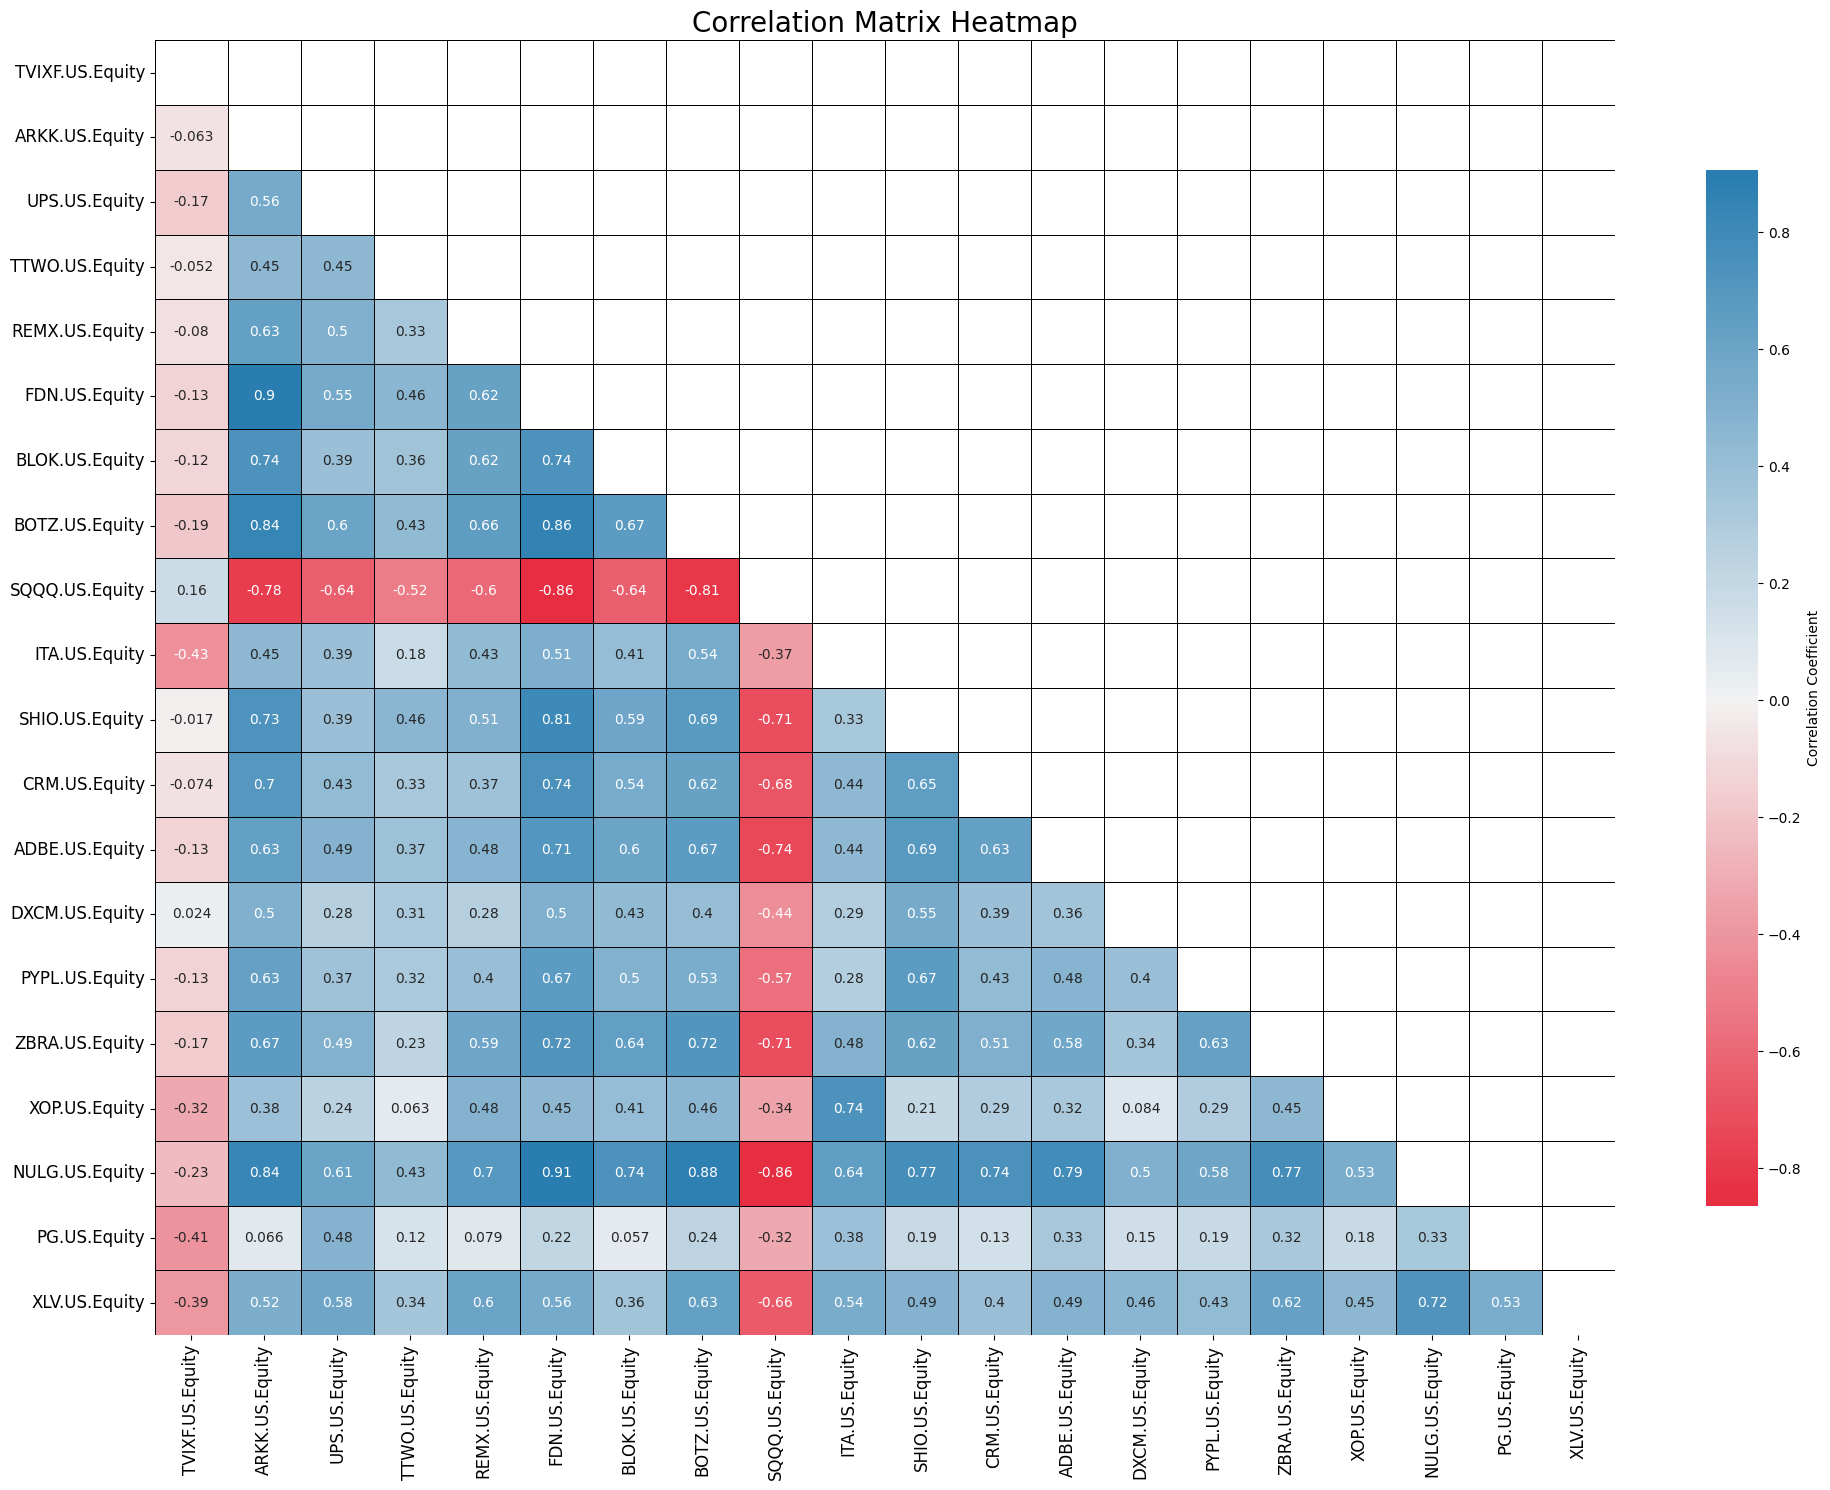

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#### key diff - added a mask to only show the lower triangle of the heatmap, since the matrix is symmetric, and displaying both halves can be redundant.
# Set the size of the plot
plt.figure(figsize=(20,15))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the color palette with higher contrast at extremes
cmap = sns.diverging_palette(10, 240, s=90, l=50, n=9, as_cmap=True)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, mask=mask,
            linewidths=0.5, linecolor='black', cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

# Set the title and adjust the plot aesthetics
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


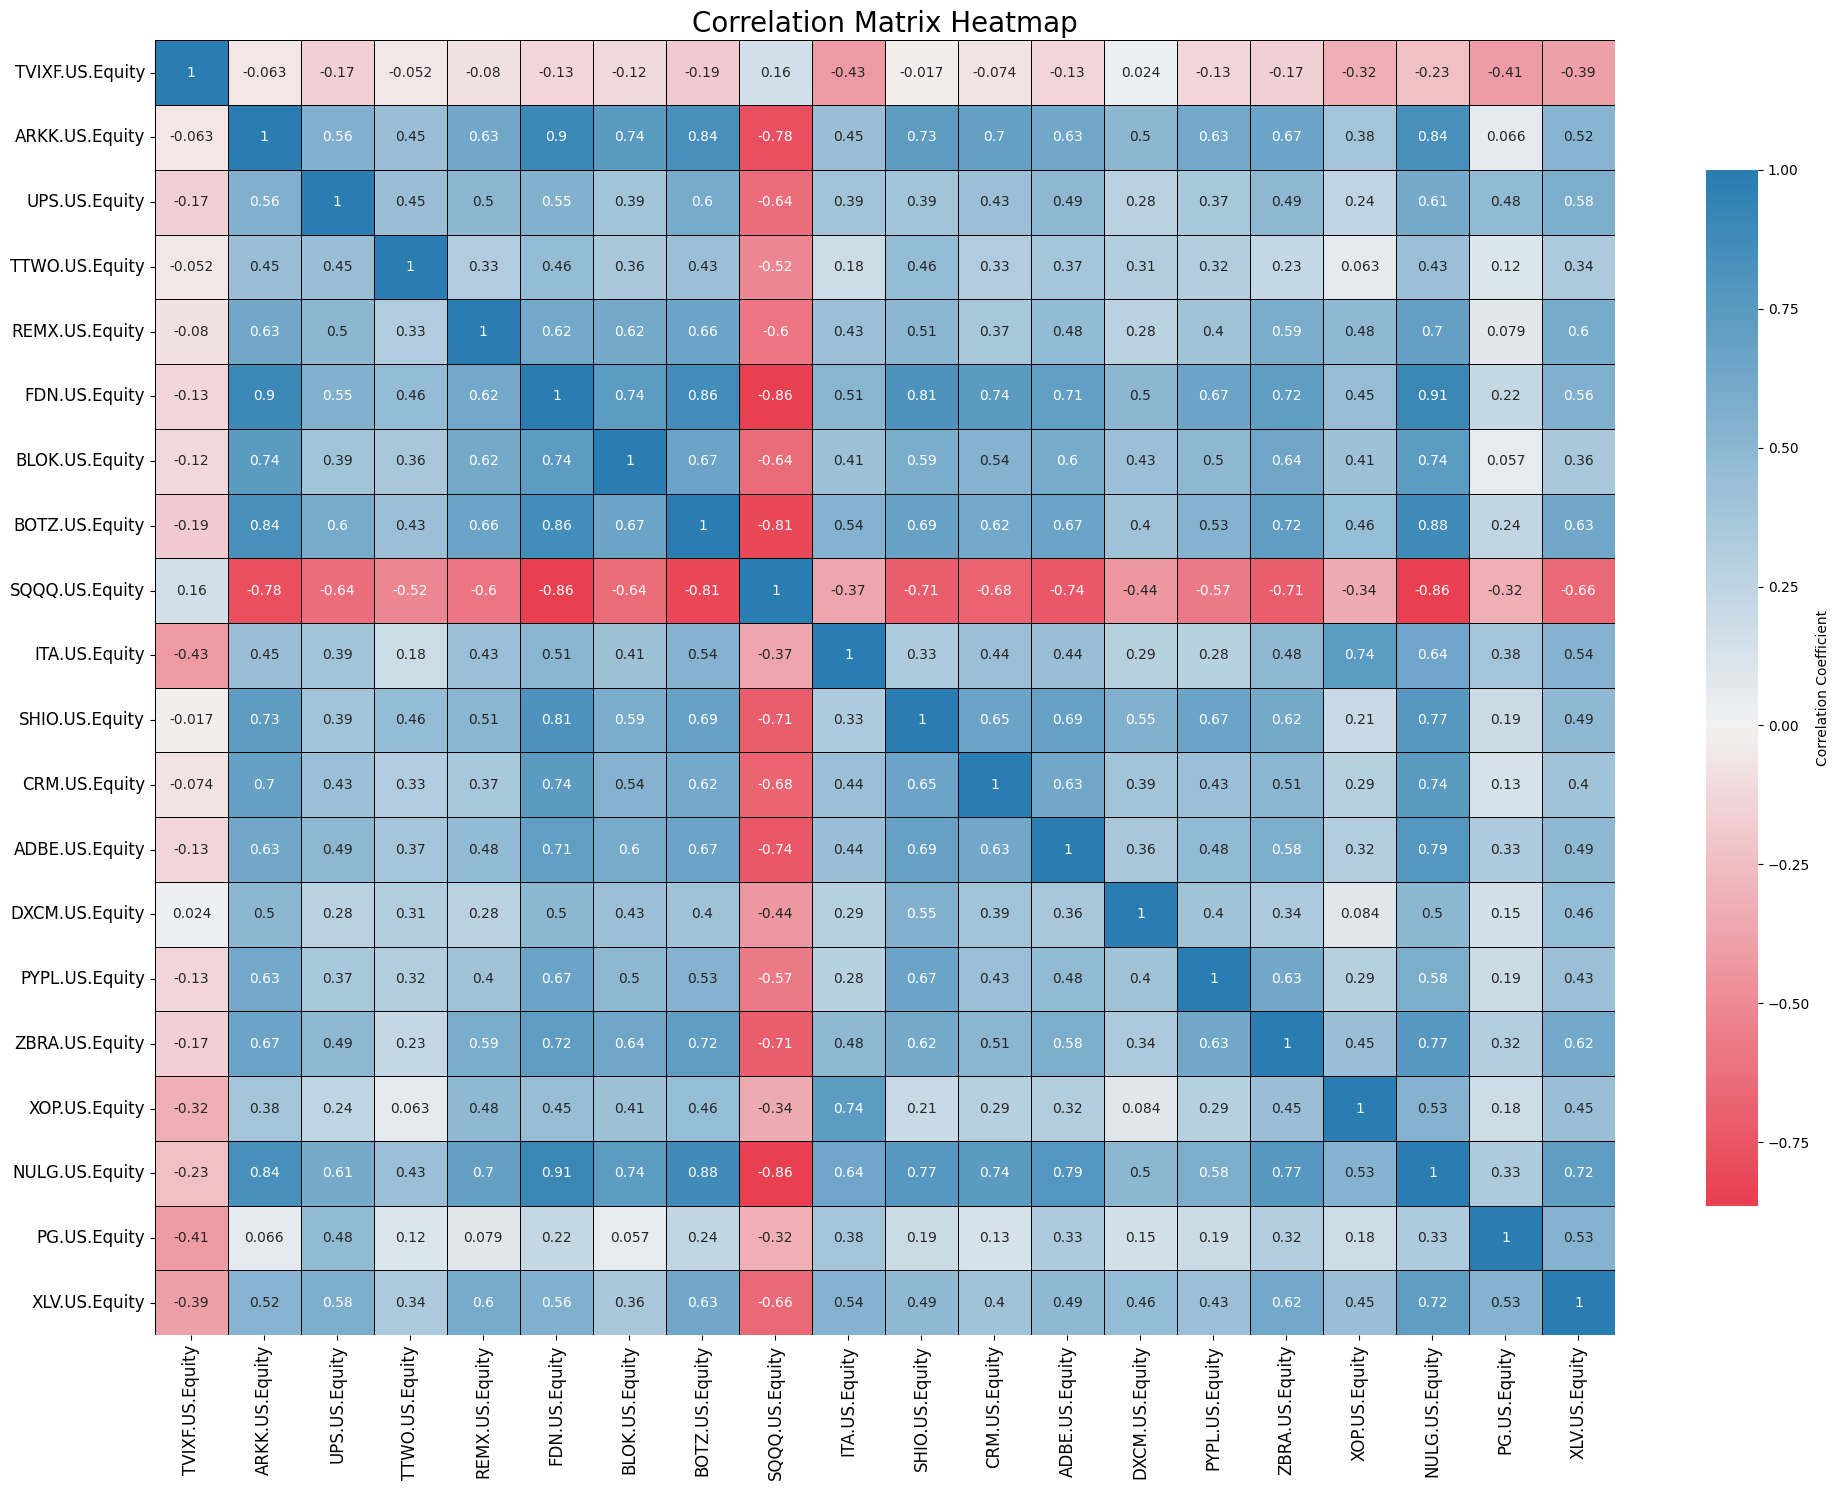

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(20,15))

# Set up the color palette with higher contrast at extremes
cmap = sns.diverging_palette(10, 240, s=90, l=50, n=9, as_cmap=True)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0,
            linewidths=0.5, linecolor='black', cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

# Set the title and adjust the plot aesthetics
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


In [19]:
# 1. Confirm Diagonal Values
diagonal_values = correlation_matrix.values.diagonal()

# 2. Negative Correlations
negative_correlations = correlation_matrix.where((correlation_matrix < -0.5) & (correlation_matrix != -1))

# 3. High Positive Correlations
high_positive_correlations = correlation_matrix.where((correlation_matrix > 0.8) & (correlation_matrix != 1))

# 4. Inverse ETFs (we'll consider an asset as an inverse ETF if it has negative correlation with more than 80% of other assets)
inverse_etfs = correlation_matrix[correlation_matrix < 0].count() > 0.8 * len(correlation_matrix)

# 5. Diversification (assets with average absolute correlation less than 0.5 with other assets)
average_abs_correlation = correlation_matrix.abs().mean()
diversification_assets = average_abs_correlation[average_abs_correlation < 0.5]

diagonal_values, negative_correlations.stack().dropna(), high_positive_correlations.stack().dropna(), inverse_etfs, diversification_assets


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]),
 ARKK.US.Equity  SQQQ.US.Equity   -0.783943
 UPS.US.Equity   SQQQ.US.Equity   -0.636873
 TTWO.US.Equity  SQQQ.US.Equity   -0.515230
 REMX.US.Equity  SQQQ.US.Equity   -0.600292
 FDN.US.Equity   SQQQ.US.Equity   -0.860570
 BLOK.US.Equity  SQQQ.US.Equity   -0.639487
 BOTZ.US.Equity  SQQQ.US.Equity   -0.809651
 SQQQ.US.Equity  ARKK.US.Equity   -0.783943
                 UPS.US.Equity    -0.636873
                 TTWO.US.Equity   -0.515230
                 REMX.US.Equity   -0.600292
                 FDN.US.Equity    -0.860570
                 BLOK.US.Equity   -0.639487
                 BOTZ.US.Equity   -0.809651
                 SHIO.US.Equity   -0.712034
                 CRM.US.Equity    -0.679702
                 ADBE.US.Equity   -0.737976
                 PYPL.US.Equity   -0.567969
                 ZBRA.US.Equity   -0.712949
                 NULG.US.Equity   -0.864147
                 XLV.U

In [42]:
# Calculate the variance-covariance matrix for the asset returns (excluding the Dates column)
variance_covariance_matrix = asset_returns.iloc[:, 1:].cov()

# Display the variance-covariance matrix
variance_covariance_matrix


,TVIXF.US.Equity,ARKK.US.Equity,UPS.US.Equity,TTWO.US.Equity,REMX.US.Equity,FDN.US.Equity,BLOK.US.Equity,BOTZ.US.Equity,SQQQ.US.Equity,ITA.US.Equity,SHIO.US.Equity,CRM.US.Equity,ADBE.US.Equity,DXCM.US.Equity,PYPL.US.Equity,ZBRA.US.Equity,XOP.US.Equity,NULG.US.Equity,PG.US.Equity,XLV.US.Equity
TVIXF.US.Equity,0.304821,-0.004341,-0.008345,-0.002544,-0.005325,-0.005311,-0.008061,-0.008805,0.017505,-0.018690,-0.001629,-0.003935,-0.007371,0.001739,-0.009454,-0.010972,-0.030215,-0.008385,-0.011440,-0.009826
ARKK.US.Equity,-0.004341,0.015601,0.006370,0.004981,0.009559,0.008023,0.011448,0.008676,-0.019397,0.004428,0.015648,0.008464,0.007924,0.008340,0.010148,0.009764,0.008196,0.006762,0.000416,0.002966
UPS.US.Equity,-0.008345,0.006370,0.008332,0.003642,0.005521,0.003610,0.004433,0.004553,-0.011517,0.002856,0.006193,0.003782,0.004483,0.003334,0.004416,0.005282,0.003808,0.003621,0.002187,0.002411
TTWO.US.Equity,-0.002544,0.004981,0.003642,0.007994,0.003550,0.002949,0.004040,0.003209,-0.009126,0.001272,0.007124,0.002836,0.003355,0.003719,0.003701,0.002449,0.000958,0.002500,0.000528,0.001382
REMX.US.Equity,-0.005325,0.009559,0.005521,0.003550,0.014549,0.005351,0.009258,0.006642,-0.014344,0.004155,0.010498,0.004350,0.005745,0.004398,0.006221,0.008342,0.010000,0.005443,0.000480,0.003282
FDN.US.Equity,-0.005311,0.008023,0.003610,0.002949,0.005351,0.005087,0.006536,0.005064,-0.012159,0.002916,0.009932,0.005112,0.005064,0.004719,0.006224,0.006036,0.005463,0.004182,0.000794,0.001808
BLOK.US.Equity,-0.008061,0.011448,0.004433,0.004040,0.009258,0.006536,0.015430,0.006874,-0.015736,0.004077,0.012664,0.006544,0.007508,0.007122,0.007993,0.009272,0.008727,0.005917,0.000354,0.002006
BOTZ.US.Equity,-0.008805,0.008676,0.004553,0.003209,0.006642,0.005064,0.006874,0.006869,-0.013293,0.003565,0.009778,0.004994,0.005525,0.004424,0.005719,0.006974,0.006512,0.004692,0.000998,0.002371
SQQQ.US.Equity,0.017505,-0.019397,-0.011517,-0.009126,-0.014344,-0.012159,-0.015736,-0.013293,0.039244,-0.005812,-0.024294,-0.013016,-0.014639,-0.011410,-0.014619,-0.016535,-0.011641,-0.011065,-0.003170,-0.005907
ITA.US.Equity,-0.018690,0.004428,0.002856,0.001272,0.004155,0.002916,0.004077,0.003565,-0.005812,0.006320,0.004579,0.003369,0.003505,0.003021,0.002922,0.004496,0.010019,0.003311,0.001519,0.001943


from matplotlib import pyplot as plt
_df_0['TVIXF.US.Equity'].plot(kind='hist', bins=20, title='TVIXF.US.Equity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ARKK.US.Equity'].plot(kind='hist', bins=20, title='ARKK.US.Equity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['UPS.US.Equity'].plot(kind='hist', bins=20, title='UPS.US.Equity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['TTWO.US.Equity'].plot(kind='hist', bins=20, title='TTWO.US.Equity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TVIXF.US.Equity', y='ARKK.US.Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ARKK.US.Equity', y='UPS.US.Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='UPS.US.Equity', y='TTWO.US.Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='TTWO.US.Equity', y='REMX.US.Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['TVIXF.US.Equity'].plot(kind='line', figsize=(8, 4), title='TVIXF.US.Equity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['ARKK.US.Equity'].plot(kind='line', figsize=(8, 4), title='ARKK.US.Equity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['UPS.US.Equity'].plot(kind='line', figsize=(8, 4), title='UPS.US.Equity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['TTWO.US.Equity'].plot(kind='line', figsize=(8, 4), title='TTWO.US.Equity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [65]:
# Save the variance-covariance matrix to a CSV file
variance_covariance_matrix.to_csv('variance_covariance.csv', index=True)


In [28]:
# Annualize the variance-covariance matrix
annualized_variance_covariance_matrix = variance_covariance_matrix * 12

# Display the annualized variance-covariance matrix
annualized_variance_covariance_matrix


,TVIXF.US.Equity,ARKK.US.Equity,UPS.US.Equity,TTWO.US.Equity,REMX.US.Equity,FDN.US.Equity,BLOK.US.Equity,BOTZ.US.Equity,SQQQ.US.Equity,ITA.US.Equity,SHIO.US.Equity,CRM.US.Equity,ADBE.US.Equity,DXCM.US.Equity,PYPL.US.Equity,ZBRA.US.Equity,XOP.US.Equity,NULG.US.Equity,PG.US.Equity,XLV.US.Equity
TVIXF.US.Equity,3.657847,-0.052089,-0.100142,-0.030522,-0.063905,-0.063728,-0.096734,-0.105660,0.210062,-0.224275,-0.019547,-0.047218,-0.088448,0.020865,-0.113446,-0.131663,-0.362574,-0.100625,-0.137283,-0.117910
ARKK.US.Equity,-0.052089,0.187208,0.076444,0.059774,0.114710,0.096274,0.137382,0.104110,-0.232767,0.053130,0.187774,0.101564,0.095092,0.100075,0.121770,0.117174,0.098353,0.081146,0.004987,0.035596
UPS.US.Equity,-0.100142,0.076444,0.099989,0.043701,0.066256,0.043320,0.053191,0.054630,-0.138199,0.034268,0.074321,0.045384,0.053791,0.040006,0.052990,0.063389,0.045698,0.043449,0.026250,0.028933
TTWO.US.Equity,-0.030522,0.059774,0.043701,0.095928,0.042605,0.035384,0.048483,0.038513,-0.109509,0.015263,0.085486,0.034031,0.040262,0.044632,0.044408,0.029384,0.011497,0.030001,0.006333,0.016582
REMX.US.Equity,-0.063905,0.114710,0.066256,0.042605,0.174586,0.064213,0.111098,0.079705,-0.172124,0.049858,0.125982,0.052202,0.068946,0.052771,0.074656,0.100099,0.120005,0.065313,0.005763,0.039384
FDN.US.Equity,-0.063728,0.096274,0.043320,0.035384,0.064213,0.061044,0.078435,0.060764,-0.145909,0.034997,0.119188,0.061346,0.060772,0.056628,0.074689,0.072436,0.065555,0.050179,0.009524,0.021693
BLOK.US.Equity,-0.096734,0.137382,0.053191,0.048483,0.111098,0.078435,0.185157,0.082488,-0.188832,0.048925,0.151964,0.078523,0.090100,0.085459,0.095914,0.111265,0.104730,0.071002,0.004246,0.024067
BOTZ.US.Equity,-0.105660,0.104110,0.054630,0.038513,0.079705,0.060764,0.082488,0.082428,-0.159519,0.042783,0.117339,0.059927,0.066298,0.053083,0.068629,0.083683,0.078148,0.056304,0.011971,0.028453
SQQQ.US.Equity,0.210062,-0.232767,-0.138199,-0.109509,-0.172124,-0.145909,-0.188832,-0.159519,0.470923,-0.069743,-0.291522,-0.156193,-0.175674,-0.136921,-0.175424,-0.198416,-0.139694,-0.132776,-0.038044,-0.070879
ITA.US.Equity,-0.224275,0.053130,0.034268,0.015263,0.049858,0.034997,0.048925,0.042783,-0.069743,0.075842,0.054948,0.040433,0.042057,0.036249,0.035061,0.053956,0.120234,0.039727,0.018232,0.023317


In [66]:
# Save the annualized variance-covariance matrix to a CSV file
annualized_variance_covariance_matrix.to_csv('variance_covariance_annualized.csv', index=True)


In [29]:
import numpy as np

# Number of assets
num_assets = len(annualized_variance_covariance_matrix)

# Set initial weights: equal weights for all assets
initial_weights = np.ones(num_assets) / num_assets

initial_weights


array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [30]:
# Calculate expected return of the portfolio using matrix multiplication
portfolio_expected_return = np.dot(annualized_returns.values, initial_weights)

portfolio_expected_return


0.21800243585000006

In [31]:
from scipy.optimize import minimize

# Objective function: Portfolio variance
def objective(weights):
    return np.dot(weights, np.dot(annualized_variance_covariance_matrix.values, weights))

# Constraints: Sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Boundaries: No restrictions on weights (they can be negative, indicating short positions)
bounds = tuple((-1, 1) for asset in range(num_assets))

# Minimize the objective function with constraints
solution = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimized weights
optimized_weights = solution.x

optimized_weights


array([ 0.00926014, -0.05540581, -0.01012219,  0.0583074 , -0.02448956,
        0.34008378,  0.02407139,  0.02558682,  0.17023165, -0.1100049 ,
       -0.06277275,  0.03486096,  0.0373516 , -0.02649893,  0.0071507 ,
       -0.00354661, -0.01162263,  0.20046019,  0.07605774,  0.32104103])

In [67]:
import pandas as pd

# Convert optimized weights to DataFrame
optimized_weights_df = pd.DataFrame(optimized_weights, columns=["Optimized Weights"], index=annualized_variance_covariance_matrix.columns)

# Save the DataFrame to a CSV file
optimized_weights_df.to_csv('optimized_weights.csv', index=True)


In [32]:
# Calculate expected return for the MVE portfolio using the optimized weights
mve_expected_return = np.dot(annualized_returns.values, optimized_weights)

mve_expected_return


0.16428982787234453

In [68]:
# Optimization function with expected return constraint
def objective_with_return_constraint(weights, target_return):
    portfolio_return = np.dot(annualized_returns.values, weights)
    return np.dot(weights, np.dot(annualized_variance_covariance_matrix.values, weights))

# Constraints
def return_constraint(weights, target_return):
    return np.dot(annualized_returns.values, weights) - target_return

# Results containers
optimized_weights_list = []
expected_returns_list = []
variances_list = []
std_devs_list = []

# Perform optimization 10 times
for i in range(1, 11):
    target_return = mve_expected_return + 0.01 * i
    constraints = (
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
        {'type': 'eq', 'fun': lambda weights: return_constraint(weights, target_return)}
    )

    solution = minimize(objective_with_return_constraint, initial_weights, args=target_return, method='SLSQP', bounds=bounds, constraints=constraints)

    # Extract results
    opt_weights = solution.x
    opt_expected_return = np.dot(annualized_returns.values, opt_weights)
    opt_variance = np.dot(opt_weights, np.dot(annualized_variance_covariance_matrix.values, opt_weights))
    opt_std_dev = np.sqrt(opt_variance)

    # Append to lists
    optimized_weights_list.append(opt_weights)
    expected_returns_list.append(opt_expected_return)
    variances_list.append(opt_variance)
    std_devs_list.append(opt_std_dev)

optimized_weights_list,expected_returns_list, variances_list, std_devs_list


([array([ 9.51529630e-03, -4.81785547e-02, -6.64461462e-03,  6.06105693e-02,
         -2.31982646e-02,  3.24632974e-01,  1.94732235e-02,  3.03494031e-02,
          1.76367937e-01, -1.14893355e-01, -6.12007593e-02,  3.93824174e-02,
          4.15388072e-02, -2.38311787e-02,  8.95474681e-03,  2.52634149e-05,
         -8.35989960e-03,  1.93948584e-01,  7.26779293e-02,  3.08829475e-01]),
  array([ 0.01016097, -0.04285617, -0.00367539,  0.06137065, -0.02224187,
          0.31951729,  0.01810253,  0.03515178,  0.18083025, -0.11478254,
         -0.06006711,  0.04143604,  0.04402192, -0.02391467,  0.0098968 ,
          0.00372508, -0.00576545,  0.17660059,  0.06929757,  0.30319175]),
  array([ 0.0107818 , -0.03756327, -0.00065834,  0.06200233, -0.02125592,
          0.31514016,  0.01715234,  0.03997776,  0.1852795 , -0.11457283,
         -0.05897228,  0.04311758,  0.04648838, -0.0241916 ,  0.01087388,
          0.00737815, -0.00322716,  0.15851601,  0.06571226,  0.29802123]),
  array([ 0.01132

In [34]:
# Create a DataFrame for the expected returns and standard deviations
efficient_portfolios = pd.DataFrame({
    'Expected Returns': expected_returns_list,
    'Standard Deviation': std_devs_list
})

efficient_portfolios


,Expected Returns,Standard Deviation
0,0.17429,0.048857
1,0.18429,0.049199
2,0.19429,0.049767
3,0.20429,0.050559
4,0.21429,0.051515
5,0.22429,0.052698
6,0.23429,0.054070
7,0.24429,0.055610
8,0.25429,0.057200
9,0.26429,0.059054


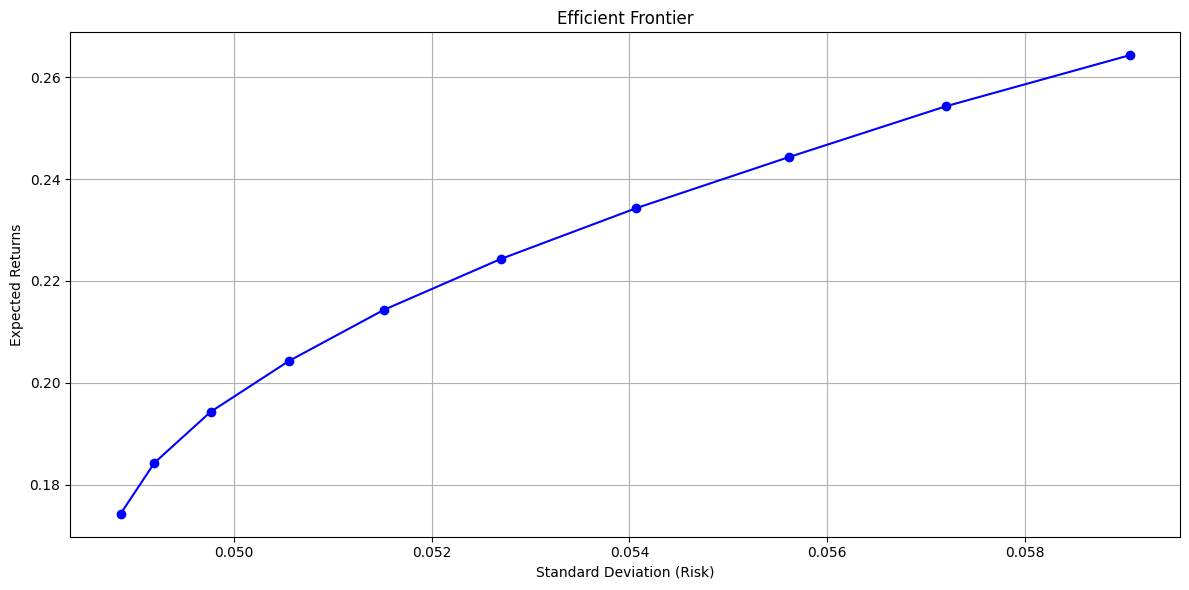

In [37]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(efficient_portfolios['Standard Deviation'], efficient_portfolios['Expected Returns'], marker='o', linestyle='-', color='b')
plt.title('Efficient Frontier')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Returns')
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
# Constraints for the MVE portfolio with short sale constraints
constraints_short_sale = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Boundaries: All weights should be non-negative (no shorting allowed)
bounds_short_sale = tuple((0, 1) for asset in range(num_assets))

# Optimize for the MVE portfolio with short sale constraints
solution_short_sale = minimize(objective_with_return_constraint, initial_weights, args=mve_expected_return, method='SLSQP', bounds=bounds_short_sale, constraints=constraints_short_sale)

# Extract the optimized weights for MVE portfolio with short sale constraints
optimized_weights_mve_short_sale = solution_short_sale.x

# Calculate expected return and variance for the MVE portfolio with short sale constraints
mve_expected_return_short_sale = np.dot(annualized_returns.values, optimized_weights_mve_short_sale)
mve_variance_short_sale = np.dot(optimized_weights_mve_short_sale, np.dot(annualized_variance_covariance_matrix.values, optimized_weights_mve_short_sale))

mve_expected_return_short_sale, mve_variance_short_sale


(0.19749955971825972, 0.003506294708438217)

In [36]:
# Results containers for portfolios with short sale constraints
optimized_weights_list_short_sale = []
expected_returns_list_short_sale = []
variances_list_short_sale = []
std_devs_list_short_sale = []

# Perform optimization 10 times with short sale constraints
for i in range(1, 11):
    target_return = mve_expected_return_short_sale + 0.01 * i
    constraints = (
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
        {'type': 'eq', 'fun': lambda weights: return_constraint(weights, target_return)}
    )

    solution = minimize(objective_with_return_constraint, initial_weights, args=target_return, method='SLSQP', bounds=bounds_short_sale, constraints=constraints)

    # Extract results
    opt_weights = solution.x
    opt_expected_return = np.dot(annualized_returns.values, opt_weights)
    opt_variance = np.dot(opt_weights, np.dot(annualized_variance_covariance_matrix.values, opt_weights))
    opt_std_dev = np.sqrt(opt_variance)

    # Append to lists
    optimized_weights_list_short_sale.append(opt_weights)
    expected_returns_list_short_sale.append(opt_expected_return)
    variances_list_short_sale.append(opt_variance)
    std_devs_list_short_sale.append(opt_std_dev)

# Create a DataFrame for the expected returns and standard deviations with short sale constraints
efficient_portfolios_short_sale = pd.DataFrame({
    'Expected Returns (Short Sale Constraints)': expected_returns_list_short_sale,
    'Standard Deviation (Short Sale Constraints)': std_devs_list_short_sale
})

efficient_portfolios_short_sale


,Expected Returns (Short Sale Constraints),Standard Deviation (Short Sale Constraints)
0,0.2075,0.059392
1,0.2175,0.059894
2,0.2275,0.060689
3,0.2375,0.061739
4,0.2475,0.063038
5,0.2575,0.064524
6,0.2675,0.066209
7,0.2775,0.068076
8,0.2875,0.070113
9,0.2975,0.072289


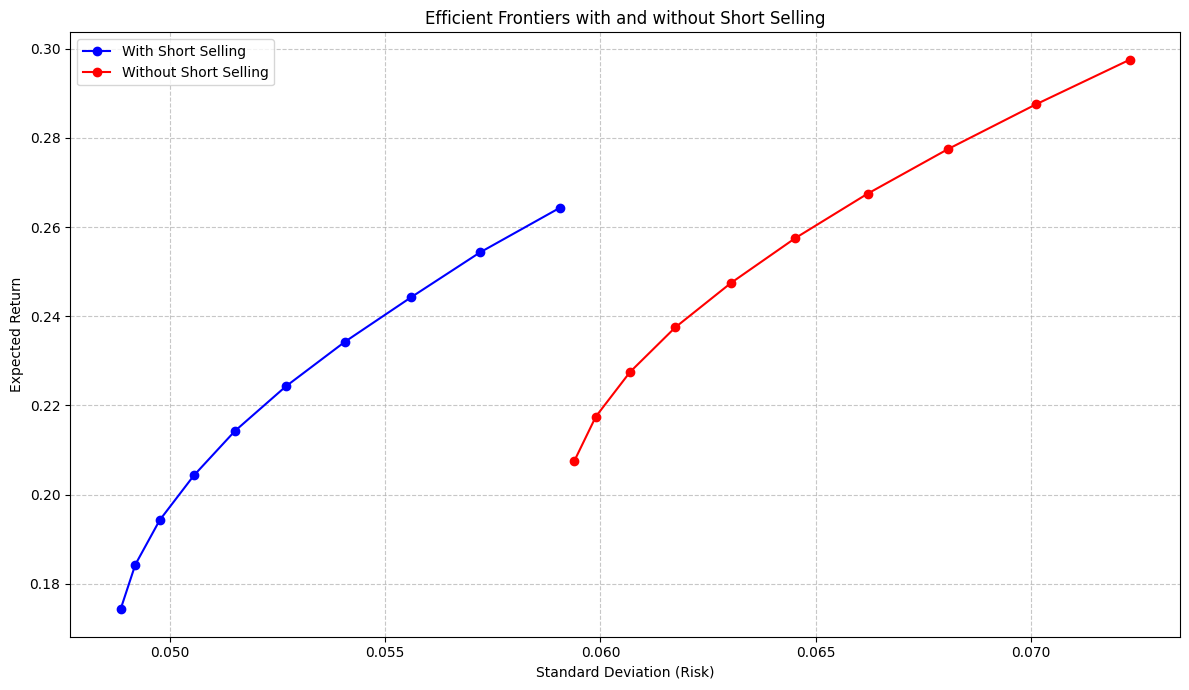

In [40]:
# Plotting again
plt.figure(figsize=(12, 7))
plt.plot(efficient_portfolios['Standard Deviation'], efficient_portfolios['Expected Returns'], '-o', color='blue', label='With Short Selling')
plt.plot(efficient_portfolios_short_sale['Standard Deviation (Short Sale Constraints)'], efficient_portfolios_short_sale['Expected Returns (Short Sale Constraints)'], '-o', color='red', label='Without Short Selling')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontiers with and without Short Selling')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()